In [1]:
import pandas as pd #importing pandas

In [2]:
Data=pd.read_csv('survey lung cancer.csv')
df=Data.copy() #copying the main dataframe
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In this datset the columns that have 1 and 2 values means NO and YES respectively.

In [3]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [16]:
df.shape

(309, 16)

In [3]:
df.isnull().sum() #checking if there is any null value.....no column has null value

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [4]:
df.duplicated().sum() #checking if there is any duplicate......there are 33 duplicated values

np.int64(33)

In [5]:
df.drop_duplicates(inplace=True) #dropping the duplicated values

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(276, 16)

In [8]:
df = df.rename(columns={'FATIGUE ': 'FATIGUE', 'ALLERGY ': 'ALLERGY'}) 

In [25]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt #importing matplotlib for visualization
%matplotlib inline

In [10]:
import seaborn as sns #importing seaborn for visualization

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

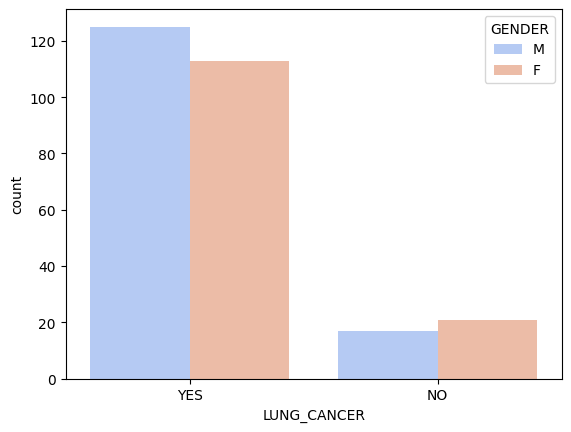

In [11]:
#counting how many male and females have positive and negative cases of lung cancer
sns.countplot(x='LUNG_CANCER', hue='GENDER', data=df,palette="coolwarm") 

<Axes: xlabel='LUNG_CANCER', ylabel='AGE'>

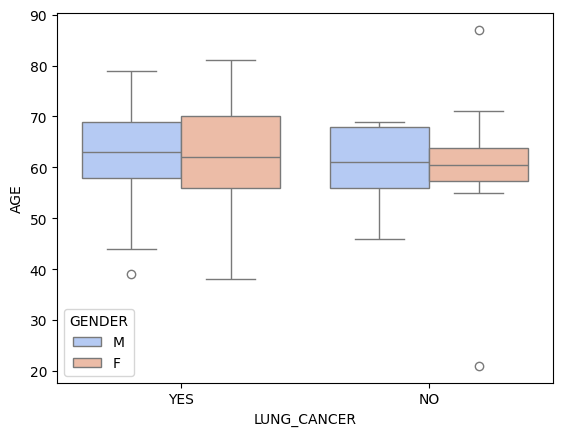

In [ ]:
#The age range of positive and negative cases of lung cancer of both male and female
sns.boxplot(data=df,x='LUNG_CANCER',y='AGE',hue='GENDER',palette="coolwarm")

C:\Users\HP\AppData\Local\Temp\ipykernel_12872\1489215267.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heat_df['GENDER']=heat_df['GENDER'].replace({'M':1,'F':0})
C:\Users\HP\AppData\Local\Temp\ipykernel_12872\1489215267.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heat_df['LUNG_CANCER']=heat_df['LUNG_CANCER'].replace({'YES':1,'NO':0})


<Axes: >

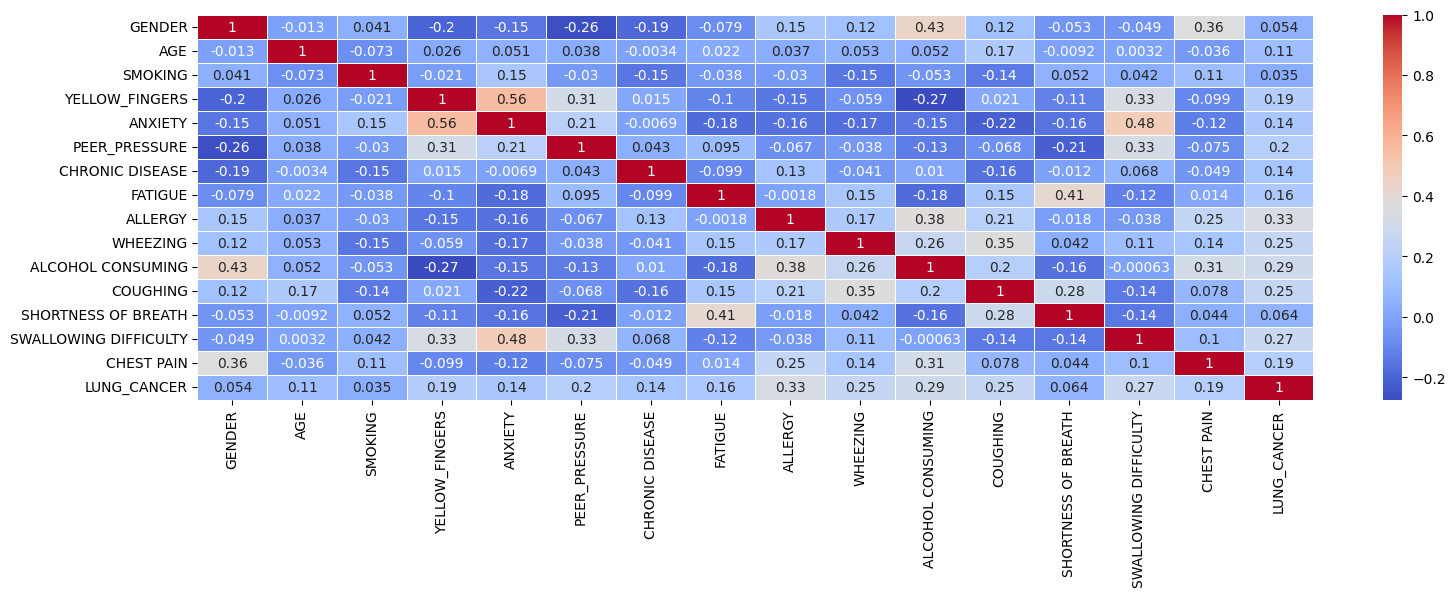

In [ ]:
#generating heatmap to see the correlation between the columns
#to generate heatmap the categorical columns are converted into numerical columns
heat_df=df.copy()
heat_df['GENDER']=heat_df['GENDER'].replace({'M':1,'F':0}) #converting categorical column to numeric column
heat_df['LUNG_CANCER']=heat_df['LUNG_CANCER'].replace({'YES':1,'NO':0}) #converting categorical column to numeric column
corr=heat_df.corr()
plt.figure(figsize=(18, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

The following operations include creating dataframes, one having the conditions and bad habits of the people such as smoking,alcohol cunsumption,allergy,peer pressure,existance of chronic disease for both male and female having both positive and negative cases of lung cancer.The dataframe called as S.

Another dataframe have the symptoms which are yellow fingers,anxiety,fatigue,wheezing,coughing,shortness of breath,swallowing difficulty,chest pain of both male and female having both positive and negative cases of lung cancer.The dataframe called as J.

In [ ]:
#operations to create S dataframe
s=df.groupby(['LUNG_CANCER','GENDER','SMOKING','ALCOHOL CONSUMING','ALLERGY','PEER_PRESSURE','CHRONIC DISEASE']).size()
s.head(5)

LUNG_CANCER  GENDER  SMOKING  ALCOHOL CONSUMING  ALLERGY  PEER_PRESSURE  CHRONIC DISEASE
NO           F       1        1                  1        1              1                  5
                                                                         2                  5
                                                          2              1                  1
                     2        1                  1        1              1                  5
                                                                         2                  1
dtype: int64

In [14]:
s.shape

(68,)

In [15]:
type(s)

pandas.core.series.Series

In [ ]:
S=pd.DataFrame(s) #the datframe consisting the bad habits and previous condition
S.head(5)

0
LUNG_CANCER GENDER SMOKING ALCOHOL CONSUMING ALLERGY PEER_PRESSURE CHRONIC DISEASE   
NO          F      1       1                 1       1             1                5
                                                                   2                5
                                                     2             1                1
                   2       1                 1       1             1                5
                                                                   2                1

In [17]:
S.rename(columns={0:'NO_Of_PEOPLE'}, inplace=True)
S.head(5)

NO_Of_PEOPLE
LUNG_CANCER GENDER SMOKING ALCOHOL CONSUMING ALLERGY PEER_PRESSURE CHRONIC DISEASE              
NO          F      1       1                 1       1             1                           5
                                                                   2                           5
                                                     2             1                           1
                   2       1                 1       1             1                           5
                                                                   2                           1

With this new dataframe S we can find out the number of people who are either male or female having cancer or not with the specified conditions
two illustrations are run onthe folliowing cells
1.Number of people who are male and have lung cancer
2.Number of people who are male and have lung cancer and only smokes,no other bad habits or conditions.

In [ ]:
#multiindexing query on the dataframe S
S.loc[('YES','M')].sum() #NO of people who are male and have lung cancer

NO_Of_PEOPLE    125
dtype: int64

In [ ]:
S.loc[('YES','M',2,1,1,1,1)] #NO of people who are male and have lung cancer and only smokes,no other bad habits or conditions

NO_Of_PEOPLE    1
Name: (YES, M, 2, 1, 1, 1, 1), dtype: int64

In [ ]:
S.loc[('NO',['M','F'],2,1,1,1,1)] #male or female that do not have cancer but only smokes

NO_Of_PEOPLE
LUNG_CANCER GENDER SMOKING ALCOHOL CONSUMING ALLERGY PEER_PRESSURE CHRONIC DISEASE              
NO          M      2       1                 1       1             1                           2
            F      2       1                 1       1             1                           5

Other things could be found from S dataframe for example:
1.Number of male or female that have cancer who only smokes and consume alcohol
coding line- S.loc[('YES',['M','F'],2,2,1,1,1)]
2.Number of female that do not have cancer but smokes and consume alcohol
coding line- S.loc[('NO','F',2,2,1,1,1)]
3.Number of people who do not have cancer but have all bad habits and previous conditions
coding line- S.loc[('NO',['M','F'],2,2,2,2,2)]

Now we are going to slice dataframe S to find who has lung cancer regardless of having or not having bad habits or not

In [21]:
Total_Lung_cancer=S.xs('YES',level='LUNG_CANCER')
Total_Lung_cancer.head(5)

NO_Of_PEOPLE
GENDER SMOKING ALCOHOL CONSUMING ALLERGY PEER_PRESSURE CHRONIC DISEASE              
F      1       1                 1       1             1                           1
                                                       2                           2
                                         2             1                           4
                                                       2                           2
                                 2       1             2                           8

The next query would be to compare which is the most common cause people have in this dataset to have lung cancer
then is the least common cause to not have lung cancer regardless of having all or any bad habits.

In [ ]:
#Query for having lung cancer regardless of having all or any bad habits.
Total_smoking=Total_Lung_cancer.xs(2,level='SMOKING').sum()
Total_alcohol_consuming=Total_Lung_cancer.xs(2,level='ALCOHOL CONSUMING').sum()
Total_allergy=Total_Lung_cancer.xs(2,level='ALLERGY').sum()
Total_peer_pressure=Total_Lung_cancer.xs(2,level='PEER_PRESSURE').sum()
Total_chronic_disease=Total_Lung_cancer.xs(2,level='CHRONIC DISEASE').sum()

In [25]:
all_data=[Total_smoking,Total_alcohol_consuming,Total_allergy,Total_peer_pressure,Total_chronic_disease]
index=['Smoking','Alcohol','Allergy','Total_peer_pressure','chronic_disease']
T= pd.DataFrame(all_data,index=index)
T

,NO_Of_PEOPLE
Smoking,131
Alcohol,145
Allergy,146
Total_peer_pressure,130
chronic_disease,131


In [26]:
Not_Lung_cancer=S.xs('NO',level='LUNG_CANCER')
Not_Lung_cancer.head(5)

NO_Of_PEOPLE
GENDER SMOKING ALCOHOL CONSUMING ALLERGY PEER_PRESSURE CHRONIC DISEASE              
F      1       1                 1       1             1                           5
                                                       2                           5
                                         2             1                           1
       2       1                 1       1             1                           5
                                                       2                           1

In [ ]:
#Query for not having lung cancer regardless of having all or any bad habits.
Total_smoking_not=Not_Lung_cancer.xs(2,level='SMOKING').sum()
Total_alcohol_consuming_not=Not_Lung_cancer.xs(2,level='ALCOHOL CONSUMING').sum()
Total_allergy_not=Not_Lung_cancer.xs(2,level='ALLERGY').sum()
Total_peer_pressure_not=Not_Lung_cancer.xs(2,level='PEER_PRESSURE').sum()
Total_chronic_disease_not=Not_Lung_cancer.xs(2,level='CHRONIC DISEASE').sum()

In [33]:
all_data=[Total_smoking_not,Total_alcohol_consuming_not,Total_allergy_not,Total_peer_pressure_not,Total_chronic_disease_not]
Index=['Smoking','Alcohol','Allergy','Total_peer_pressure','chronic_disease']
Z= pd.DataFrame(all_data,index=Index)
Z

,NO_Of_PEOPLE
Smoking,19
Alcohol,7
Allergy,5
Total_peer_pressure,10
chronic_disease,13


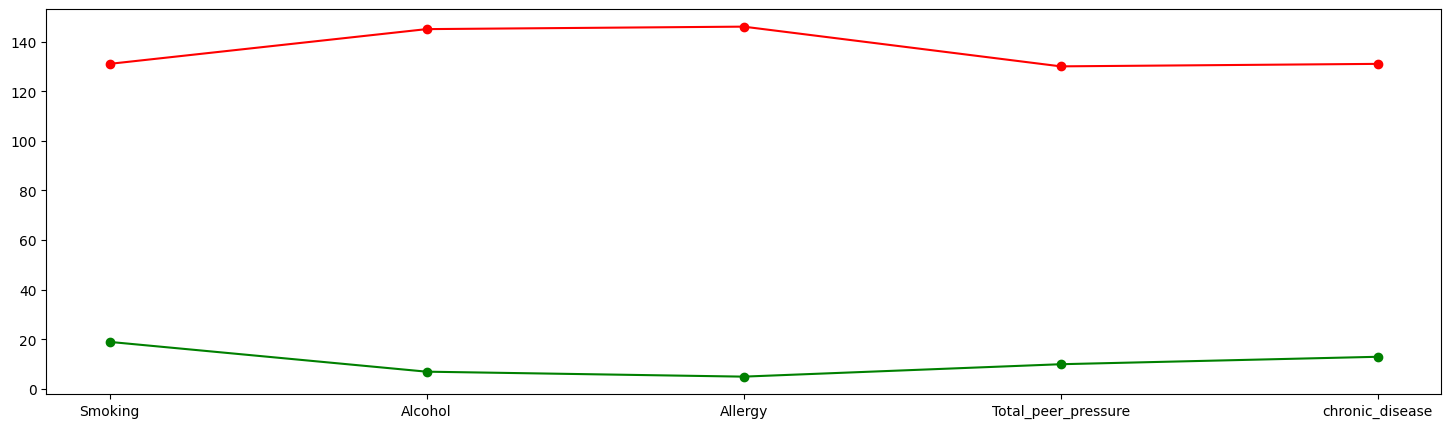

In [ ]:
#camparing them on graph
plt.figure(figsize=(18, 5))
plt.plot(Z,c='green',marker='o')
plt.plot(T,c='red',marker='o')

The most common cause to have lung cancer in this dataset is having allergy,than alcohol consuming.

The least common cause to not have lung cancer is not having allergy,than alcohol consuming.

In [ ]:
#operations to create J dataframe
j=df.groupby(['LUNG_CANCER','GENDER','ANXIETY','FATIGUE','WHEEZING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN']).size() 
j.tail()

LUNG_CANCER  GENDER  ANXIETY  FATIGUE  WHEEZING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN
YES          M       2        2        2         1         1                    2                      2             2
                                                           2                    1                      1             2
                                                 2         2                    1                      2             1
                                                                                2                      1             3
                                                                                                       2             5
dtype: int64

In [36]:
j.shape

(100,)

In [37]:
type(j)

pandas.core.series.Series

In [ ]:
J = pd.DataFrame(j) #crateing the j dataframe
J.head(5)

0
LUNG_CANCER GENDER ANXIETY FATIGUE WHEEZING COUGHING SHORTNESS OF BREATH SWALLOWING DIFFICULTY CHEST PAIN   
NO          F      1       1       1        1        1                   1                     1           1
                                                                                               2           1
                                                     2                   1                     1           1
                                   2        1        2                   2                     1           1
                                            2        2                   1                     1           2

In [ ]:
J.rename(columns={0:'NO_Of_PEOPLE'}, inplace=True)
J.head(5)

NO_Of_PEOPLE
LUNG_CANCER GENDER ANXIETY FATIGUE WHEEZING COUGHING SHORTNESS OF BREATH SWALLOWING DIFFICULTY CHEST PAIN              
NO          F      1       1       1        1        1                   1                     1                      1
                                                                                               2                      1
                                                     2                   1                     1                      1
                                   2        1        2                   2                     1                      1
                                            2        2                   1                     1                      2

In [ ]:
#Some queries out of this J dataframe
J.loc[('YES','M',2,1,1,1,1,1,1)].sum() #no of male having lung cancer with only having anxiety

np.int64(1)

In [ ]:
J.loc[('NO',['M','F'],2,1,1,1,1)] # no of male or female who do not have lung cancer with having only anxiety

NO_Of_PEOPLE
LUNG_CANCER GENDER ANXIETY FATIGUE WHEEZING COUGHING SHORTNESS OF BREATH SWALLOWING DIFFICULTY CHEST PAIN              
NO          M      2       1       1        1        1                   1                     1                      3
                                                                         2                     2                      3

NOTE-Some queries will give error as there is no people who meet up the condition in the dataframe.

Now we are going to slice dataframe J to find who has lung cancer regardless of having or not having all or any symptoms or not

In [ ]:
Total_Lung_cancer_signs=J.xs('YES',level='LUNG_CANCER')
Total_Lung_cancer_signs.head(5)

NO_Of_PEOPLE
GENDER ANXIETY FATIGUE WHEEZING COUGHING SHORTNESS OF BREATH SWALLOWING DIFFICULTY CHEST PAIN              
F      1       1       1        1        1                   1                     1                      1
                                         2                   1                     1                      1
                                2        1                   2                     1                      1
                                         2                   1                     1                      3
                       2        1        1                   2                     2                      2

The next query would be to compare which is the most common symptoms people have in this dataset to have lung cancer
then is the least common symptoms to not have lung cancer regardless of having all or any bad symptoms.

In [ ]:
##Query for having lung cancer regardless of having all or any symptoms.
Total_anxiety=Total_Lung_cancer_signs.xs(2,level='ANXIETY').sum()
Total_fatigue=Total_Lung_cancer_signs.xs(2,level='FATIGUE').sum()
Total_wheezing=Total_Lung_cancer_signs.xs(2,level='WHEEZING').sum()
Total_coughing=Total_Lung_cancer_signs.xs(2,level='COUGHING').sum()
Total_shortness_of_breath=Total_Lung_cancer_signs.xs(2,level='SHORTNESS OF BREATH').sum()
Total_swallowing_difficulty=Total_Lung_cancer_signs.xs(2,level='SWALLOWING DIFFICULTY').sum()
Total_chest_pain=Total_Lung_cancer_signs.xs(2,level='CHEST PAIN').sum()

In [46]:
All_data_signs=[Total_anxiety,Total_fatigue,Total_wheezing,Total_coughing,Total_shortness_of_breath,Total_swallowing_difficulty,Total_chest_pain]
index_signs=['ANXIETY','FATIGUE','WHEEZING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN']
H= pd.DataFrame(data=All_data_signs,index=index_signs)
H

,NO_Of_PEOPLE
ANXIETY,125
FATIGUE,165
WHEEZING,142
COUGHING,149
SHORTNESS OF BREATH,153
SWALLOWING DIFFICULTY,124
CHEST PAIN,142


In [ ]:
#Now we are going to slice dataframe J to find who has no lung cancer regardless of having or not having all or any symptoms.
Total_Lung_cancer_no_signs=J.xs('NO',level='LUNG_CANCER')
Total_Lung_cancer_no_signs.head(5)

NO_Of_PEOPLE
GENDER ANXIETY FATIGUE WHEEZING COUGHING SHORTNESS OF BREATH SWALLOWING DIFFICULTY CHEST PAIN              
F      1       1       1        1        1                   1                     1                      1
                                                                                   2                      1
                                         2                   1                     1                      1
                       2        1        2                   2                     1                      1
                                2        2                   1                     1                      2

In [ ]:
##Query for having no lung cancer regardless of having all or any symptoms.
Total_anxiety_negative=Total_Lung_cancer_no_signs.xs(2,level='ANXIETY').sum()
Total_fatigue_negative=Total_Lung_cancer_no_signs.xs(2,level='FATIGUE').sum()
Total_wheezing_negative=Total_Lung_cancer_no_signs.xs(2,level='WHEEZING').sum()
Total_coughing_negative=Total_Lung_cancer_no_signs.xs(2,level='COUGHING').sum()
Total_shortness_of_breath_negative=Total_Lung_cancer_no_signs.xs(2,level='SHORTNESS OF BREATH').sum()
Total_swallowing_difficulty_negative=Total_Lung_cancer_no_signs.xs(2,level='SWALLOWING DIFFICULTY').sum()
Total_chest_pain_negative=Total_Lung_cancer_no_signs.xs(2,level='CHEST PAIN').sum()

In [49]:
all_data_signs_negative=[Total_anxiety_negative,Total_fatigue_negative,Total_wheezing_negative,Total_coughing_negative,Total_shortness_of_breath_negative,Total_swallowing_difficulty_negative,Total_chest_pain_negative]
index_signs_negative=['ANXIETY','FATIGUE','WHEEZING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY', 'CHEST PAIN']
I= pd.DataFrame(data=all_data_signs_negative,index=index_signs_negative)
I

,NO_Of_PEOPLE
ANXIETY,12
FATIGUE,18
WHEEZING,9
COUGHING,10
SHORTNESS OF BREATH,21
SWALLOWING DIFFICULTY,5
CHEST PAIN,12


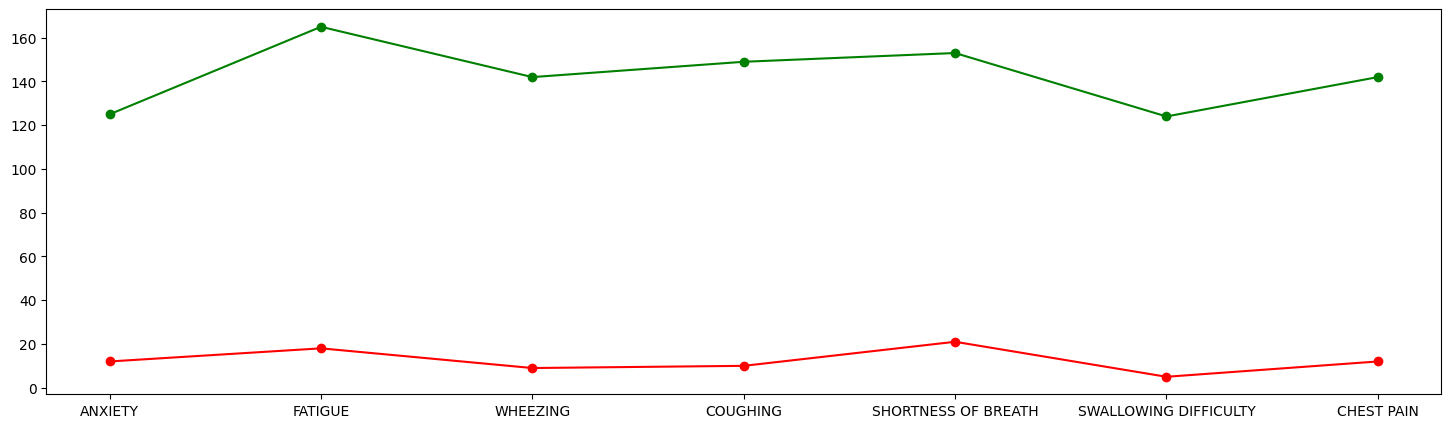

In [ ]:
#camparing them on graph
plt.figure(figsize=(18, 5))
plt.plot(H,c='green',marker='o')
plt.plot(I,c='red',marker='o')

The most common symptom to have lung cancer in this dataset is having fatigue,shortness of breath.
The least common symtom to not have lung cancer is swallowing difficulty than wheezing.